# SHAP

## Fitting a linear model

In [ ]:
import sklearn
import shap

X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# fit a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

c:\Users\usr\uni\explainable\exp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LinearRegression()

## Getting R2 score

In [2]:
print('R2 score for the model on test set =', model.score(X, y))

R2 score for the model on test set = 0.630929745299063


In [3]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


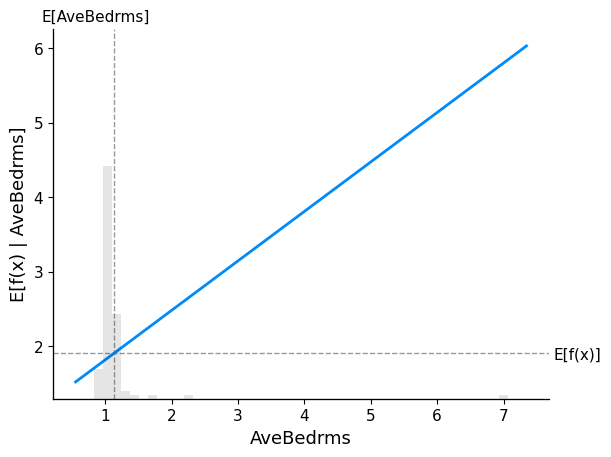

In [4]:
shap.partial_dependence_plot(
    "AveBedrms",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

## Getting a SHAP value

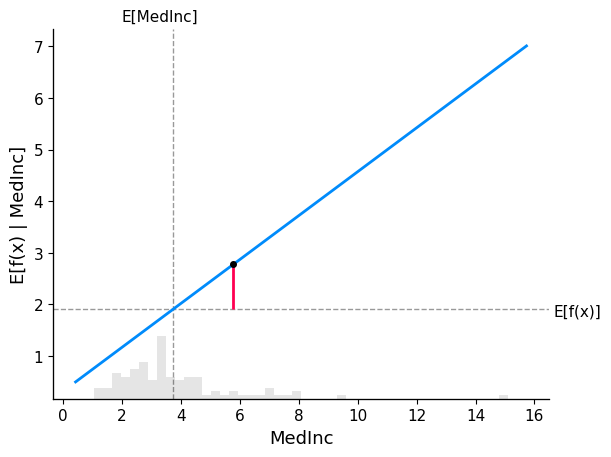

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a partial dependence plot
sample_ind = 1
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

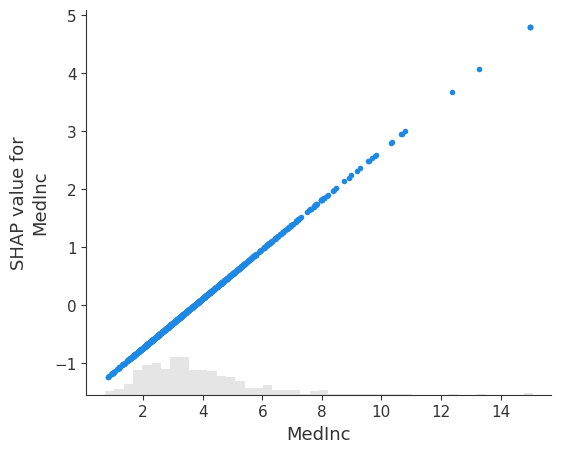

In [6]:
shap.plots.scatter(shap_values[:, "MedInc"])

## Creating a waterfall plot

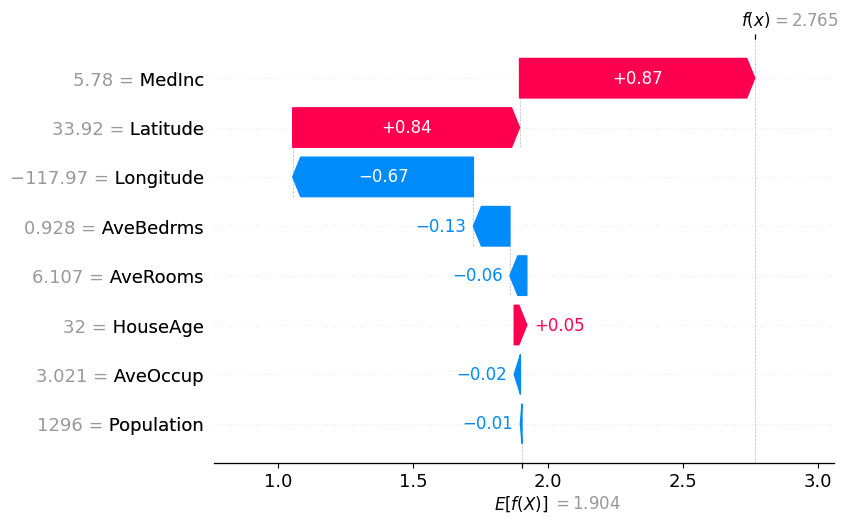

In [7]:
# the waterfall_plot shows the contribution of each feature to the model output for a single instance
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

## Using GAM model

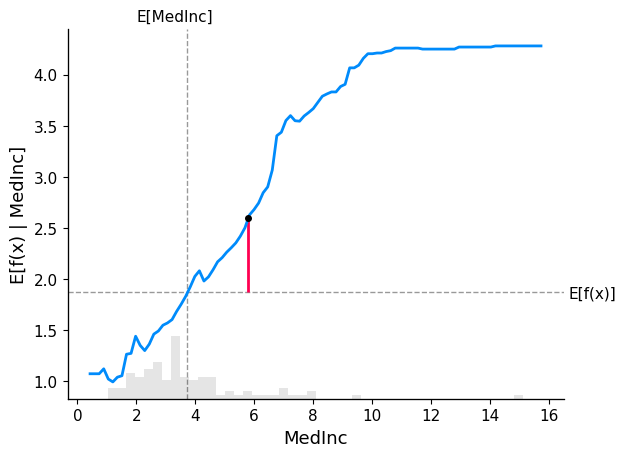

In [8]:
# fit a GAM model to the data
import interpret.glassbox

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=5)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

In [9]:
print('R2 score for the model on test set =', model_ebm.score(X, y))

R2 score for the model on test set = 0.9045170452377554


## Creating waterfall plot

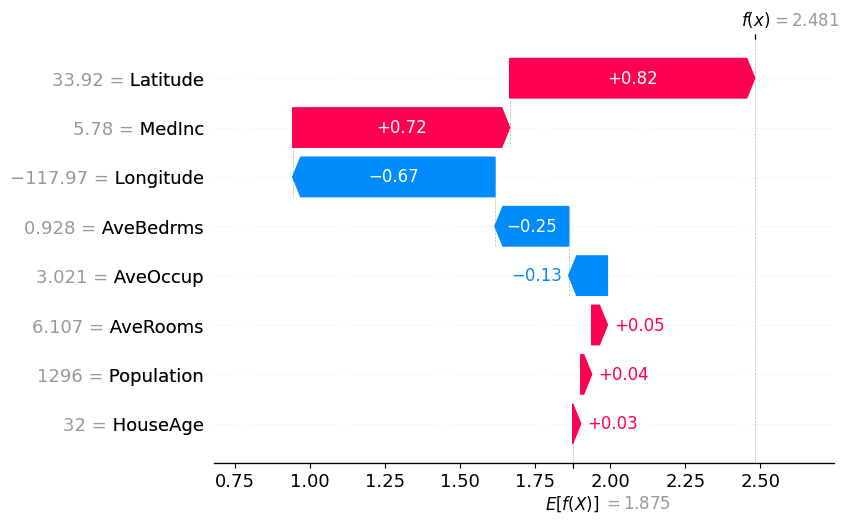

In [10]:
shap.plots.waterfall(shap_values_ebm[sample_ind])

## Creating beeswarm plot

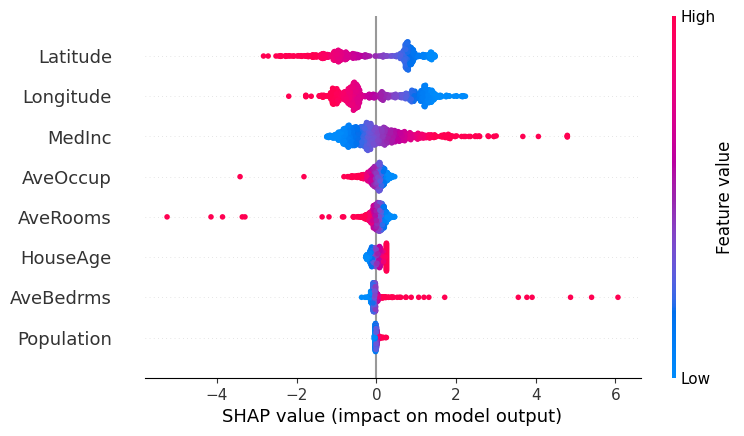

In [11]:
# the beeswarm plot displays SHAP values for each feature across all examples,
# with colors indicating how the SHAP values correlate with feature values

#for example for latitude: higher latitude values(red) are associated with lower SHAP values (blue) therefor 
shap.plots.beeswarm(shap_values)

# LIME
## Creating local explainaiton

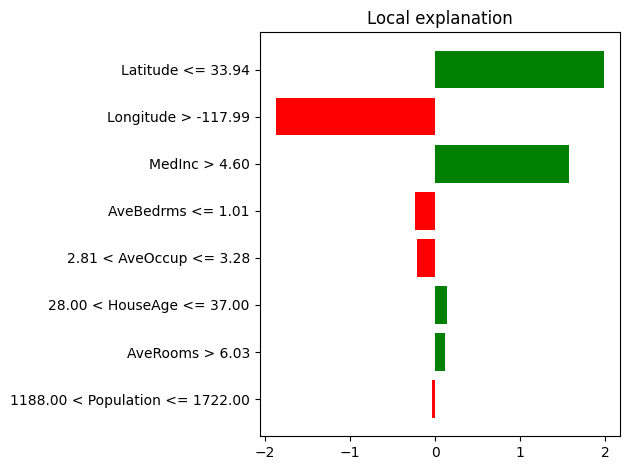

In [13]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Convert to NumPy arrays for LIME
X_array = X.values
feature_names = X.columns.tolist()

# For simplicity, use the full data for both training and testing
X_train = X_array
X_test = X_array

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    mode='regression'
)

# Pick the same instance used by SHAP
instance = X_test[sample_ind]

# Generate LIME explanation
exp = explainer.explain_instance(instance, model_ebm.predict)

# Show the explanation plot
exp.as_pyplot_figure()
plt.tight_layout()
plt.show()
